# 들어가기 앞서 간단히 내장 자료구조 리뷰
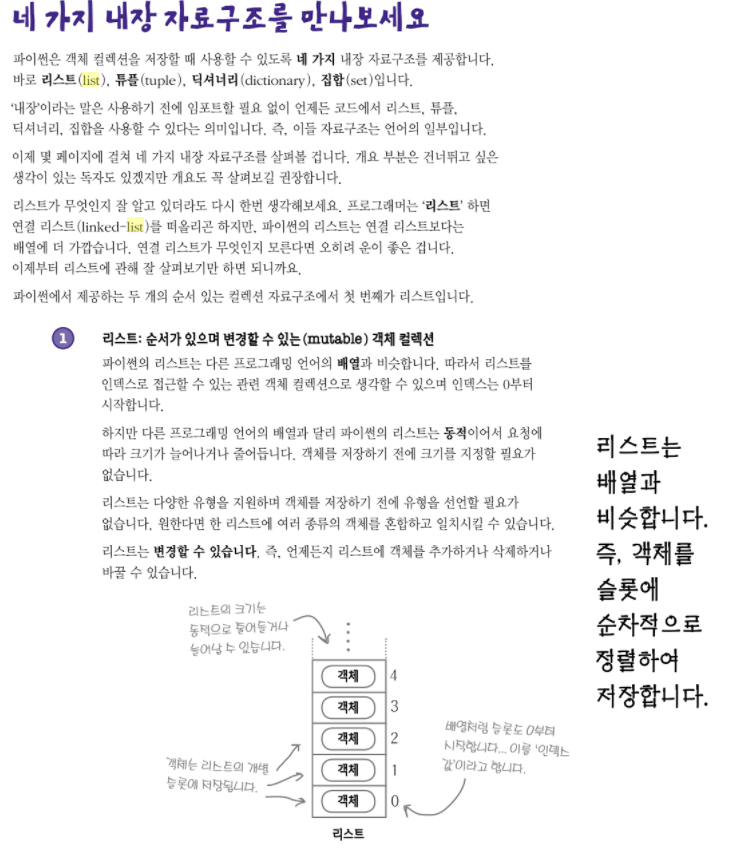

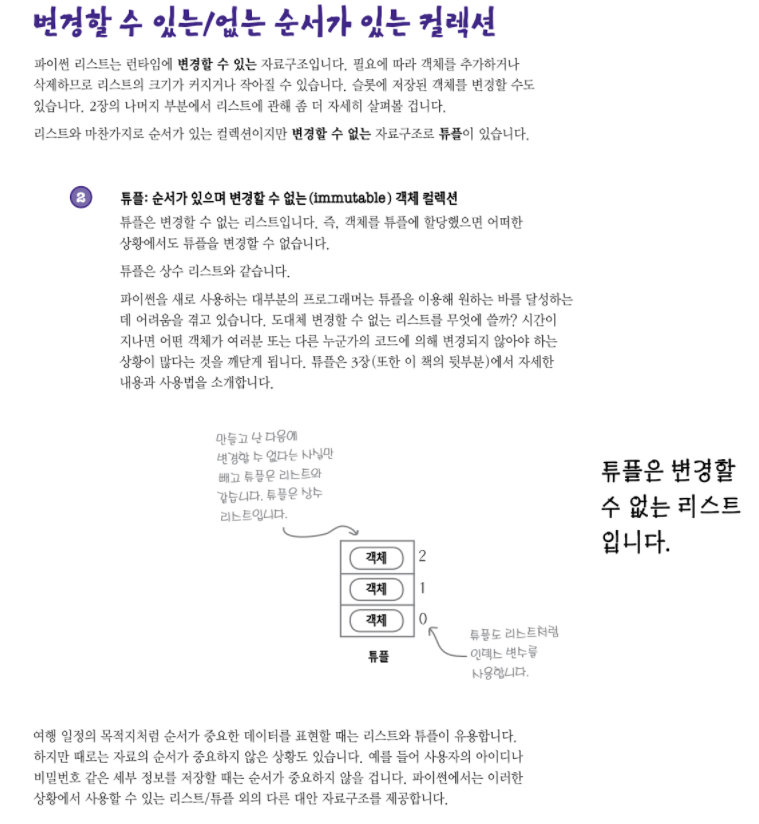

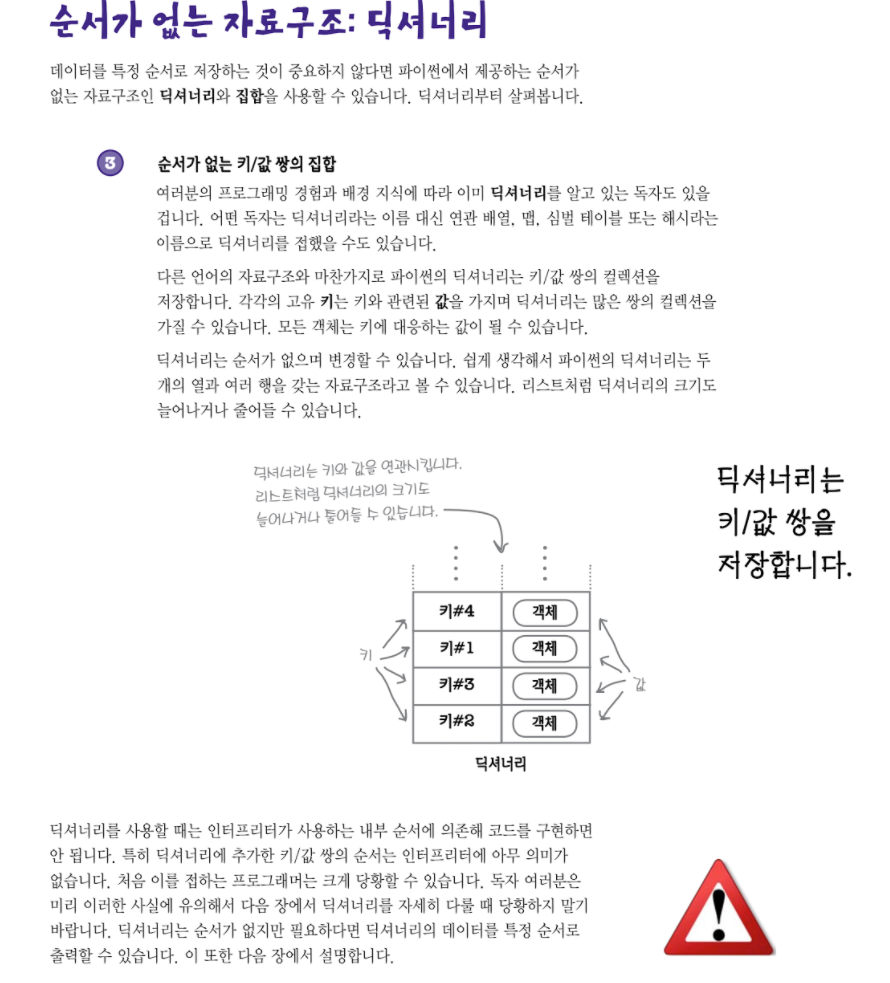

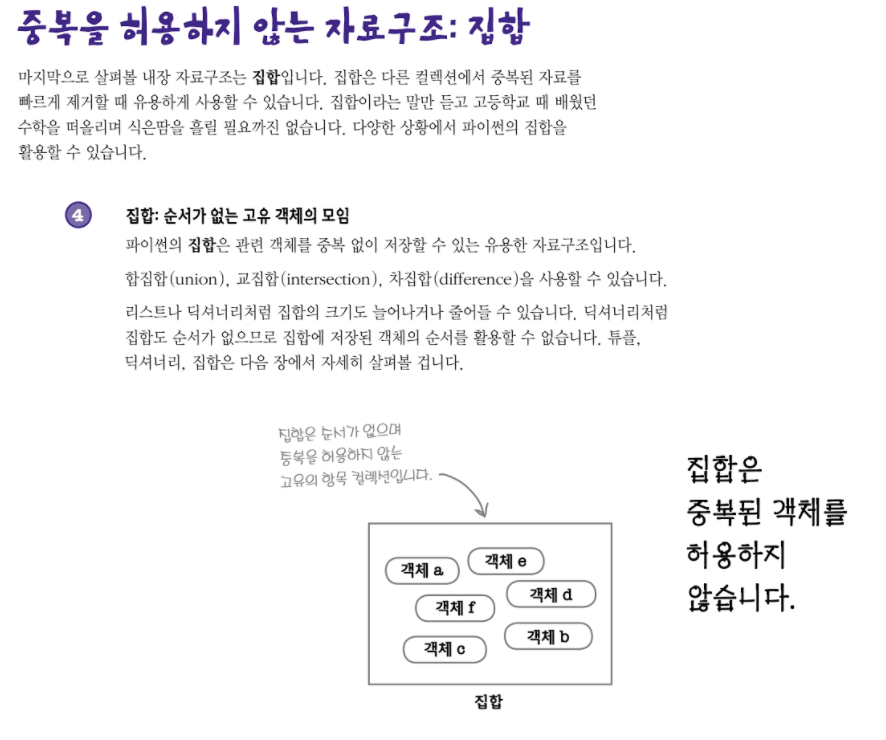

## Numerical python (NumPy) 기본 : 배열과 벡터 계산
http://www.numpy.org/  
http://aikorea.org/cs231n/python-numpy-tutorial/  
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html  
고성능의 과학계산 컴퓨팅과 데이터 분석에 필요한 기본 패키지이다. NumPy에서 제공하는 기능은 다음과 같다.
* 빠르고 메모리를 효율적으로 사용하며 벡터 산술연산과 세련된 브로드캐스트(고급기능:크기가 다른 배열 간의 연산)이 기능을 제공하는 다차원 배열인 **ndarray**
* 반복문을 작성할 필요 없이 전체 데이터 배열에 대해 빠른 연산을 제공하는 표준 수학 함수
* 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 올려진 파일을 사용하는 도구
* 선형대수, 난수 발생기, 푸리에 변환 기능
* C, C++, fortran 으로 쓰여진 코드를 통합하는 도구 

마지막 항목은 생태계 관점에서 봤을 떄 가장 중요한 기능으로, NumPy는 사용하는 편한 C API를 제공하며 데이터를 다른 저수준 언어로 쓰여진 외부 라이브러리에 쉽게 전달할 수 있다. 또한 외부 라이브러리 에서 반환된 데이터를 파이썬의 NumPy 배열 형태로 불러올 수도 있다. 이 기능은 레거시 C/C++/Fortran 코드 기반을 감싸서 동적이며 쉽게 사용할 수 있는 인터페이스를 만들 수 있는 언어로 만들어준다.  
 
 NumPy 그 자체로는 고수준의 데이터 분석 기능을 제공하지 않으므로 먼저 NumPy 배열과 배열 기반의 컴퓨팅에 대한 이해를 한다면 pandas 같은 도구를 좀 더 효율적으로 사용할 수 있다.  
 
 대부분의 데이터 분석 애플리케이션에서 중요하게 사용되는 기능은 다음과 같다.
  * 벡터 배열상에서 데이터 개조, 정제, 부분 집합, 필터링, 변형, 다른 종류의 연산의 빠른 수행
  * 정렬, 유일 원소 찾기, 집합 연산 같은 일반적인 배열 처리 알고리즘
  * 통계의 효과적인 표현과 데이터의 수집/요약
  * 다른 종류의 데이터 묶음을 병합하고 엮기 위한 데이터 정렬과 데이터 간의 관계 조작
  * if-elif-else를 포함하는 반목문 대신 사용할 수 있는 조건절을 표현할 수 있는 배열 표현
  * 데이터 그룹 전체에 적용할 수 있는 수집, 변형, 함수 적용 같은 데이터 처리(주로  pandas)  
   
NumPy는 이런 연산을 위한 기본 라이브러리를 제공하므로 대부분의 데이터 분석(특히 구조화된 데이터나 표 형식의 데이터)은 일반적인 작업을 단순하고 간단하게 만들어주는 풍부하면서도 고수준인 인터페이스를 제공하는 pandas와 함께 사용된다. 또한 pandas는 NumPy에는 없는 시계열 같은 다양한 도메인 특화 기능을 제공한다  

note:  

*표준 NumPy의 관습은 **import numpy as np** 이고 from numpy import $*$ 적은 코드는  좋은 코딩 습관은 아니다*
### NumPy 
### ndarray : 다차원 배열 객체
NumPy의 핵심 기능 중 하나는 N차원의 배열 객체는 또는  ndarray로, 파이썬에서 사용할 수 있는 대규모 데이터 집합을 담을 수 있는 빠르고 유연한 자료 구조다. 배열은 스칼라 원소 간의 연산에 사용하는 문법과 비슷한 방식을 사용해서 전체 데이터 블록에 수학적인 연산을 수행할 수 있도록 해준다.  
ndarray는 같은 종류의 데이터를 담을 수 있는 포괄적인 다차원 배열이며, ndarray의 모든 원소는 같은 자료형이어야만 한다.  
모든 배열은 각  차원의 크기를 알려주는 shapre라는 튜플과 배열에 저장된 자료형을 알려주는 dtype이라는 객체를 가지고 있다.  

note:

*"배열", "NumPy 배열", "ndarray"는 아주 극소수의 예외를 제외하면 모두 **ndarray 객체**를 이르는 말이다.*

In [5]:
import numpy as np
data = np.random.randn(2, 3)
print(data)
print(data *10)
print(data + data)
print(data.shape)
print(data.dtype)

[[ 1.01017806  1.37604352 -0.35622963]
 [-0.12636313 -0.63552405 -0.30473574]]
[[ 10.1017806   13.76043523  -3.56229626]
 [ -1.26363131  -6.35524048  -3.04735736]]
[[ 2.02035612  2.75208705 -0.71245925]
 [-0.25272626 -1.2710481  -0.60947147]]
(2, 3)
float64


### ndarray 생성
배열을 생성하는 가장 쉬운 방법은 array 함수를 이용하는 것이다. 순차적인 객체(다른 배열도 포함하여)를 받아 넘겨받은 데이터가 들어있는 새로운 NumPy 배열을 생성한다. 

In [9]:
#**예를 들어 파이썬의 리스트는 변환하기 좋은 예이다 **  
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)

[ 6.   7.5  8.   0.   1. ]


In [10]:
#또한 같은 길이의 리스트가 담겨있는 순차 데이터는 다차원 배열로 변환이 가능함.
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
print(arr2.ndim)
print(arr2.shape)

[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)


In [11]:
#명시적으로 지정하지 않는 한 np.array는 생성될 때 적절한 자료형을 추정한다
#그렇게 추정된 자료형은 dtype 객체에 저장되는데, 먼저 살펴본 예제를 예를 들어보면
print(arr1.dtype)
print(arr2.dtype)

float64
int32


또한 np.array는 새로운 배열을 생성하기 위한 여러 함수를 가지고 있는데, 예를 들면 zeros와 one는 주어진 길이나 모양에 각각 0과 1이 들어있는 배열을 생성한다. empty 함수는 초기화되지 않은 배열을 생성하는데, 이런 메소드를 사용해서 다차원 배열을 생성하려면 원하는 형태의 튜플을 넘기면 된다.

In [12]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
np.zeros((3,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
np.empty((2, 3, 2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

** arange는 파이썬의 range 함수의 배열 버전이다**

In [15]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

표 4-1은 표준 배열 생성 함수 목록이다. NumPy는 산술연산에 초점이 맞춰져있기 때문에 만약 자료형이 명시되지 않는다면 **float 64(부동 소수점)**가 될 것이다.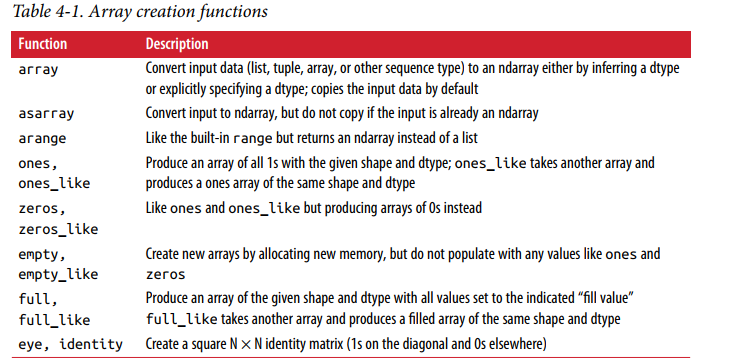

### ndarray의 자료형
자료형, dtype은 ndarray가 특정 데이터를 메모리에서 해석하기 위해 필요한 정보를 담고 있는 특수한 객체다.  
dtype이 있기에 NumPy가 강력하면서도 유연한 도구가 될 수 있었는데, 대부분의 데이터는 디스크에서 데이터를 읽고 쓰기 편하도록 하위 레벨의 표현에 직접적으로 맞춰져 있으며 C나 fortran 같은 저수준?(파이선 대비) 언어로 작성된 코드와 쉽게 연동이 가능하다. 산술 데이터의 dtype은 float, int 같은 자료형의 이름과 하나의 원소가 차지하는 비트 수로 이루어진다. 파이썬의 float 객체에서 사용되는 표준 배정밀도 부동소수점(double-precision floating point) 값은 8 바이트 혹은 64 비트로 이루어지는데, 이 자료형은 NumPy에서 float64로 표현된다.
표 4-2는 NumPy가 지원하는 모든 자료형 목록이다.

note:  
NumPy의 모든 dtype을 외울 필요는 없다. 주로 사용하게 될 자료형의 일반적인 종류(부동소수점, 복소수, 정수, 불리언, 문자열, 일반 파이썬 객체)만 신경 쓰면 된다. 주로 대용량 데이터가 메모리가 디스크에 저장되는 방식을 제어해야 할 필요가 있을 때 알아두면 좋다.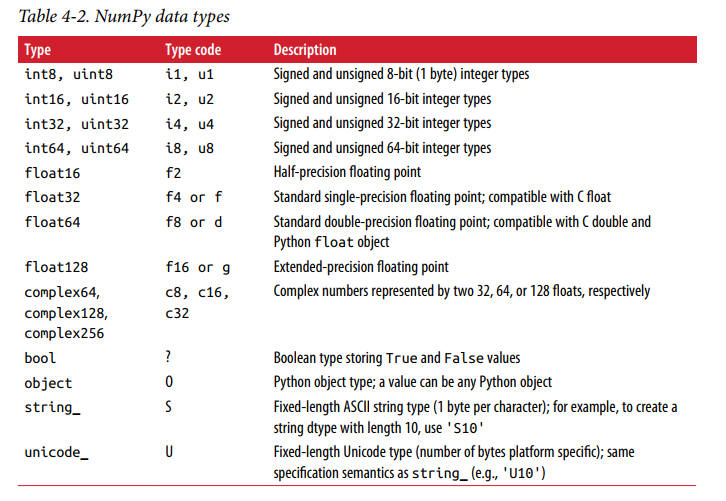

In [19]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)
#ndarray의 astype 메소드를 사용해서 배열의 dtype를 다른 형으로 명시적 변경이 가능하다.
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)
#여기서 정수형을 부동소수점으로 변환했다.

float64
int32
int32
float64


In [23]:
#만약 부동소수점 숫자를 정수형으로 변환하면 소수점 아랫자리는 버려진다.
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [24]:
arr

array([  3.7,  -1.2,  -2.6,   0.5,  12.9,  10.1])

In [25]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [28]:
# 숫자 형식의 문자열을 담고 있는 배열이 있다면 astype을 사용하여 숫자로 변환할 수있다.
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [27]:
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

만일 문자열처럼 float64형으로 변환되지 못하는 경우, 형 변환이 실패하면 TypeError 예외가 발생한다.  
이 예에서는 조금 귀찮아져서 np.float64 대신에 그냥 float라고 입력했는데 똑똑한 NumPy는 파이썬 자료형을 알맞은 dtype으로 맞춰주었다.

In [29]:
int_array = np.arange(10)

calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [30]:
#dtype으로 사용할 수 있는 축약 코드도 있다 (u4는 uint32와 동일하다)
empty_uint32 = np.empty(8, dtype='u4')

empty_uint32

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint32)

note:  
astype을 호출하면 새로운 dtype이 이전 dtype과 같아도 항상 새로운 배열을 생성(데이터를 복사)한다  
float64, float32 같은 부동소수점은 근사 값이라는 사실을 염두에 두는 게 중요한다. 복잡한 연산 중에는 부동소주점 오류가 누적되어 비교를 할 떄 특정 소수자리까지만 유효한 경우가 생길 수 있다.  
### 배열과 스칼라 간의 연산
배열은 for 반복문을 작성하지 않고 데이터를 일괄처리할 수 있기 때문에 중요하다. 이를 **벡터화**라고 하는데, 같은 크기의 배열 간 산술연산은 배열의 각 요소 단위로 적용된다.

In [33]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr*arr)
print(arr-arr)
#스칼라 값에 대한 산술연산은 각 요소로 전달된다.
print(1/arr)
print(arr**5)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[  1.   4.   9.]
 [ 16.  25.  36.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.          0.5         0.33333333]
 [ 0.25        0.2         0.16666667]]
[[  1.00000000e+00   3.20000000e+01   2.43000000e+02]
 [  1.02400000e+03   3.12500000e+03   7.77600000e+03]]


### 색인과 슬라이싱 기초
NumPy 배열 색인에 대해서는 다룰 주제가 많다. 데이터의 부분 집합이나 개별 요소를 선택하기 위한 수많은 방법이 존재한다. 1차원 배열은 단순하며 표면적으로는 파이썬의 리스트와 유사하게 동작한다.

In [35]:
arr = np.arange(10)

print(arr)

print(arr[5])

print(arr[5:8])

arr[5:8] = 12

print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


앞에서 봤듯이 arr[5:8] = 12 처럼 배열 조각에 스칼라 값을 대입하면 12가 선택 영역 전체로 전파된다 (이후로는 브로드 캐스팅이라고 한다). 리스트와의 중요한 차이점은 배열 조각(slice)은 원본 배열의 뷰(views)라는 점이다. 즉, 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영된다는 것이다.

In [36]:
arr_slice = arr[5:8]
print(arr_slice)
arr_slice[1] = 12345
print(arr)
arr_slice[:] = 64 # bare slice는 배열안의 모든 원소에 할당한다
print(arr)

[12 12 12]
[    0     1     2     3     4    12 12345    12     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


NumPy를 처음 접했거나 특히 데이터 복사가 자주 일어나는 다른 배열 프로그래밍 언어를 사용해본 적이 있다면 데이터가 복사되지 않는다는 점에 당황할 것이다.  NumPy는 대용량 데이터 처리를 염두해 두고 설계되었기 때문에 만약 NumPy가 데이터 복사를 남발한다면 성능과 메모리 문제에 직면하게 될 것이다.  
note:  
만약에 뷰 대신 ndarray 슬라이스의 복사본을 얻고 싶다면 arr[5:8].copy()를 사용해서 명시적으로 배열을 복사하면 된다.  

다차원 배열을 다루려면 좀 더 많은 옵션이 필요하다. 2차원 배열에서 각 색인에 해당하는 요소는 스칼라 값이 아니라 1차원 배열이 된다.  
따라서 개별 요소는 재귀적으로 접근해야 한다. 하지만 그렇게 하기 귀찮으니 콤마로 구분된 색인 리스트를 넘기면 된다. 따라서 다음의 두 표현은 같다.

In [37]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])
print(arr2d[0][2])
print(arr2d[0,2])

[7 8 9]
3
3


그림 4-1은 2차원 배열에 대한 색인을 묘사하고 있다.
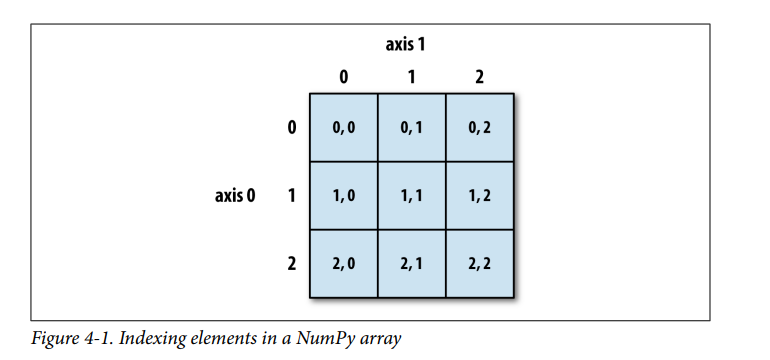
다차원 배열에서 마지막 색인을 생략하면 반환되는 객체는 상위 차원의 데이터를 포함하고 있는 한 차원 낮은 ndarray가 된다. arr3d가 $2 \times 2\times 3$크기의 배열이라면 arr3d[0]은 $2\times3$크기의 배열이다

In [40]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print("arr3d : ",arr3d)
print("arr3d[0] : ",arr3d[0])

arr3d :  [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
arr3d[0] :  [[1 2 3]
 [4 5 6]]


** arr3d[0]에는 스칼라 값과 배열 모두 대입할 수 있다**

In [47]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print("4 : ",arr3d[0])
arr3d[0] = old_values
print("5 : ",arr3d)
#이런 식으로 arr3d[1, 0]은 (1, 0)으로 색인되는 1차원 배열 형태인 모든 값을 반환한다.
arr3d[1, 0]
print("1 :",arr3d[1, 0])
x = arr3d[1]
print("2 :",x)
print("3 :",x[0])
#여기서 살펴본 선택된 배열의 부분집합은 모두 배열의 뷰를 반환한다는 점을 기억하자.

4 :  [[42 42 42]
 [42 42 42]]
5 :  [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
1 : [7 8 9]
2 : [[ 7  8  9]
 [10 11 12]]
3 : [7 8 9]


### 슬라이스 색인
파이썬의 리스트 같은 1차원 객체처럼 ndarray는 익숙한 문법으로 슬라이싱할 수 있다.

In [48]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [49]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

다차원 객체는 숫자를 조합해서 하나 이상의 축을 기준으로 슬라이싱할 수 있다. 앞에서 살펴본 arr2d를 생각해보자. 이 배열을 슬라이싱하는 방법은 조금 다르다.

In [53]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

확인했듯이 첫 번째 축인 0번 축을 기준으로 슬라이싱되었다. 슬라이스는 축을 따라 선택 영역내의 요소가 선택된다. 색인을 여러 개 넘겨서 다차원을 슬라이싱하는 것도 가능하다.

In [54]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

이렇게 슬라이싱하면 항상 같은 차원의 배열에 대한 뷰를 얻게 된다. 정수 색인과 슬라이스를 함께 사용하면 한 차원 낮은 슬라이스를 얻을 수 있다.

In [55]:
 arr2d[1, :2]

array([4, 5])

In [60]:
arr2d[:2, 2]

array([0, 0])

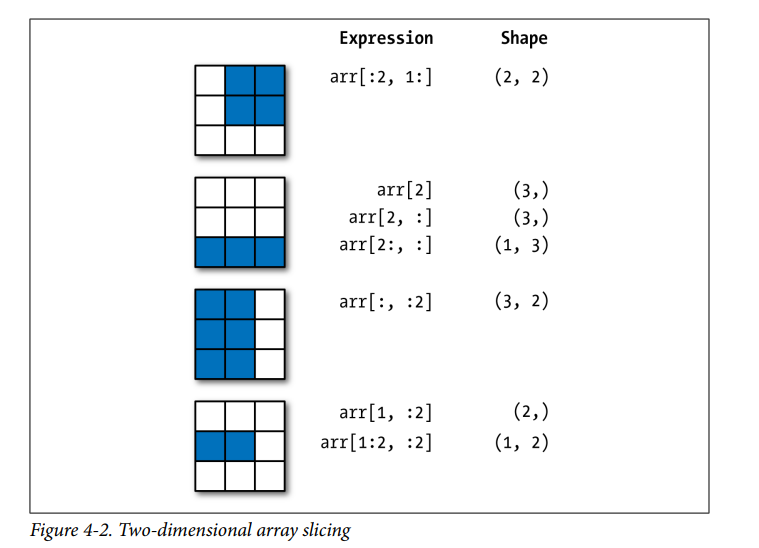을 보면 그냥 콜론만 쓰면 전체 축을 선택한다는 의미이므로 이렇게 하면 원래 차원의 슬라이스를 얻을 수있다.

In [57]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [61]:
#물론 슬라이싱 구문에 값을 대입하면 선택 영역 전체에 값이 할당된다.
arr2d[:2, 1:] = 0

In [59]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 불리언(Boolean) 색인
중복된 이름이 포함된 배열이 있다고 하자. 그리고 numpy.random 모듈에 있는 randn 함수를 사용해서 임의의 표준정규분포 데이터를 생성해보자

In [62]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7, 4)

In [63]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [64]:
data

array([[-1.48684622,  1.10766872, -0.06551999, -0.26542329],
       [-0.93976557,  1.16713444, -0.64052595,  0.7362964 ],
       [-0.14309122, -0.45494423, -1.41825146, -0.68702662],
       [-1.43542201, -0.73029141,  0.34633403, -0.44001552],
       [ 0.95711983,  0.31025098,  0.85855829,  0.66847929],
       [-1.0468932 ,  1.16552044,  0.9193084 ,  0.69404977],
       [-0.60610909, -2.14402346, -2.00142574, -0.55213442]])

각각의 이름은 data 배열의 각 row에 대응한다고 가정하자. 만약에 전체 row에서 "Bob"과 같은 이름을 선택할려면 산술연산과 마찬가지로 배열에 대한 비교 연산(==)도 벡터화 된다. 따라서 names를"Bob"문자열과 비교하면 불리언 배열을 반환한다

In [65]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [68]:
data[names == 'Bob'] #이 불리언 배열은 배열의 색인을 사용할 수 있다.

array([[-1.48684622,  1.10766872, -0.06551999, -0.26542329],
       [-1.43542201, -0.73029141,  0.34633403, -0.44001552]])

주의 : 이 불리언 배열은 반드시 색인하려는 축의 길이와 동일한 길이를 가져야 한다. 불리얼 배열 색인도 슬라이스 또는 숫자 색인과 혼용할 수 있다

In [67]:
data[names == 'Bob', 2:]

array([[-0.06551999, -0.26542329],
       [ 0.34633403, -0.44001552]])

In [70]:
data[names == 'Bob', 3]

array([-0.26542329, -0.44001552])

"Bob"이 아닌 요소를 선택하려면 != 연산자를 사용하거나 ~를 사용해서 조건절을 부정하면 된다.

In [71]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [72]:
data[~(names == 'Bob')]

array([[-0.93976557,  1.16713444, -0.64052595,  0.7362964 ],
       [-0.14309122, -0.45494423, -1.41825146, -0.68702662],
       [ 0.95711983,  0.31025098,  0.85855829,  0.66847929],
       [-1.0468932 ,  1.16552044,  0.9193084 ,  0.69404977],
       [-0.60610909, -2.14402346, -2.00142574, -0.55213442]])

세 가지 이름 중에서 두 가지 이름을 선택하려면 &(and)와 |(or) 같은 논리 연산자를 사용한 여러 개의 불리언 조건을 조합하여 사용하면 된다.\

In [73]:
mask = (names == 'Bob') | (names == 'Will')

In [74]:
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [75]:
data[mask]

array([[-1.48684622,  1.10766872, -0.06551999, -0.26542329],
       [-0.14309122, -0.45494423, -1.41825146, -0.68702662],
       [-1.43542201, -0.73029141,  0.34633403, -0.44001552],
       [ 0.95711983,  0.31025098,  0.85855829,  0.66847929]])

배열에 불리언 색인을 이용해서 데이터를 선택하면 반환되는 배열의 내용이 바뀌지 않더라도 항상 데이터 복사가 이루어진다.

** 파이썬 예약어인 and와 or는 불리언 배열에서는 사용할 수 없다.**  
불리언 배열에 값을 대입하는 것은 상식선에서 이루어지며, data에 저장된 모든 음수를 0으로 대입하려면 아래와 같이 하면 된다.

In [76]:
data[data < 0] = 0

In [77]:
data

array([[ 0.        ,  1.10766872,  0.        ,  0.        ],
       [ 0.        ,  1.16713444,  0.        ,  0.7362964 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.34633403,  0.        ],
       [ 0.95711983,  0.31025098,  0.85855829,  0.66847929],
       [ 0.        ,  1.16552044,  0.9193084 ,  0.69404977],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

1차원 불리언 배열 사용해서 전체 row 나 column을 선택하는 것은 쉽게 할 수 있다.

In [78]:
data[names != 'Joe'] = 7

In [79]:
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  1.16713444,  0.        ,  0.7362964 ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  1.16552044,  0.9193084 ,  0.69404977],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### 팬시 색인 (fancy indexing)
팬시 색인은 정수 배열을 사용한 색인을 설명하기 위해 NumPy에서 차용한 단어이다. $ 8 \times 4 $ 크기의 배열이 있다고 하자.

In [81]:
arr = np.empty((8, 4))

In [82]:
for i in range(8):
    arr[i] = i

In [83]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

특정한 순서로 로우를 선택하고 싶다면 그냥 원하는 순서로 명시된 정수가 담긴 ndarray나 list를 넘기면 된다.

In [84]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

파이썬 기초 프로그래밍 부분에서 보았듯이 색인이 음수를 한는경우 를 보았듯이 여기서도 똑같이 가능함

In [85]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

다차원 색인 배열을 넘기는 것은 조금 다르게 동작하며, 각각의 색인 튜플에 대응하는 1차원 배열이 선택된다.  
reshape(C type 이냐 fortran 타입의 배열 순서)는 고급 기능 부분에서 말할 것 이다.

In [86]:
arr = np.arange(32).reshape((8, 4))

In [87]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [88]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

이 예제를 잠시 살펴보면 (1, 0), (5, 3), (7, 1),그리고 (2, 2)에 대응하는 요소가 선택 되었다. 이 예제에서 팬시 색인은 우리의 예상과는 조금 다르게 동작했다. 행렬의 행과 열에 대응하는 사각형 모양의 값이 선택되기를 기대했는데 사실 그렇게 하려면 다음처럼 선택해야 한다.

In [89]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

$np.ix_$ 함수를 사용하면 같은 결과를 얻을 수 있는데, 1차원 정수 배열 2개를 사각형 영역에서 사용할 색인으로 변환해준다.

In [90]:
arr[np.ix_([1, 5, 7, 2],[0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

팬시 색인은 슬라이싱과 달리 선택된 데이터를 새로운 배열로 복사한다.

### 배열 전치하기와 축 바꾸기
배열 전치는 데이터를 복사하지 않고 데이터 모양이 바뀐 뷰를 반환하는 특별한 기능이다.  
ndarray는 transpose 메소드와 T라는 이름의 특수한 속성을 가지고 있다.

In [91]:
 arr = np.arange(15).reshape((3, 5))

In [92]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [93]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

행렬 계산을 할 때 자주 사용하게 될 텐데, 예를 들면 행렬의 내적 $X^{T}X$는 np.dot을 이용해서 구할 수 있다.

In [94]:
arr = np.random.randn(6, 3)

In [95]:
 np.dot(arr.T, arr)

array([[ 3.85825061,  0.48026958,  0.19877987],
       [ 0.48026958,  3.18865939,  0.18439786],
       [ 0.19877987,  0.18439786,  2.85810132]])

다차원 배열의 경우 transpose 메소드는 튜플로 축 번호를 받아서 치환한다.

In [96]:
arr = np.arange(16).reshape((2, 2, 4))

In [97]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [98]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

.T 속성을 이용하는 간단한 전치는 축을 뒤바꾸는 특별한 경우이다.  
ndarray는 swapaxes 메소드가 있는데 2개의 축 번호를 받아서 배열을 뒤바꾼다.

In [99]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [100]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 유니버설 함수 :  Fast Element-Wise Array Functions
ufunc라고 불리는 유니버셜 함수는 ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수다. 유니버셜 함수는 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결과 값을 반환하는 간단한 함수를 고속으로 수행할 수 있는 벡터화된 래퍼 함수라고 생각하면 된다.

많은 ufunc는 sqrt, exp 같은 간단한 변형을 전체 원소에 적용할 수 있다.

In [117]:
 arr = np.arange(10)

In [118]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
 np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [121]:
arr = np.random.randn(7) * 5
np.sqrt(arr, arr) # 실행하면 어떻게 될것인가?

C:\Users\177303\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([ 1.55691279,  2.54286919,         nan,  2.43024963,  1.74522788,
        1.605479  ,         nan])

In [104]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

흔하지 않지만 배열 여러 개를 반환하는 유니버셜 함수도 있다.  
modf는 파이썬 내장함수인 divmod의 벡터화 버전이며, modf는 분수를 받아 몫과 나머지를 함께 반환한다.

In [107]:
arr = np.random.randn(7)*5

In [108]:
np.modf(arr)

(array([-0.18655336, -0.27364907,  0.67815282,  0.5934434 ,  0.84601722,
         0.84996259, -0.30558476]), array([-6., -3.,  3.,  2.,  3.,  0., -0.]))

In [113]:
remainder, whole_part = np.modf(arr)

In [114]:
remainder

array([-0.18655336, -0.27364907,  0.67815282,  0.5934434 ,  0.84601722,
        0.84996259, -0.30558476])

In [115]:
whole_part

array([-6., -3.,  3.,  2.,  3.,  0., -0.])

In [109]:
x = np.random.randn(8)
y = np.random.randn(8)

In [110]:
x

array([-0.05423077,  0.52948339,  1.59233224,  0.73368133,  0.87461792,
       -0.28068917, -0.30238534,  0.08241384])

In [111]:
y

array([ 0.89654282, -1.52955836, -0.03164542,  0.22928994, -0.75424869,
       -0.71557391,  0.55585393, -1.16900529])

binary unfuncs도(주로 add , maximum 함수 이용해서 2개 배열을 1개 배열로 반환)단일 배열 반환하는 unary ufunc 처럼 참조할 수 도 있다. 

In [112]:
np.maximum(x, y) #Here, numpy.maximum computed the element-wise maximum of the elements in x and y

array([ 0.89654282,  0.52948339,  1.59233224,  0.73368133,  0.87461792,
       -0.28068917,  0.55585393,  0.08241384])

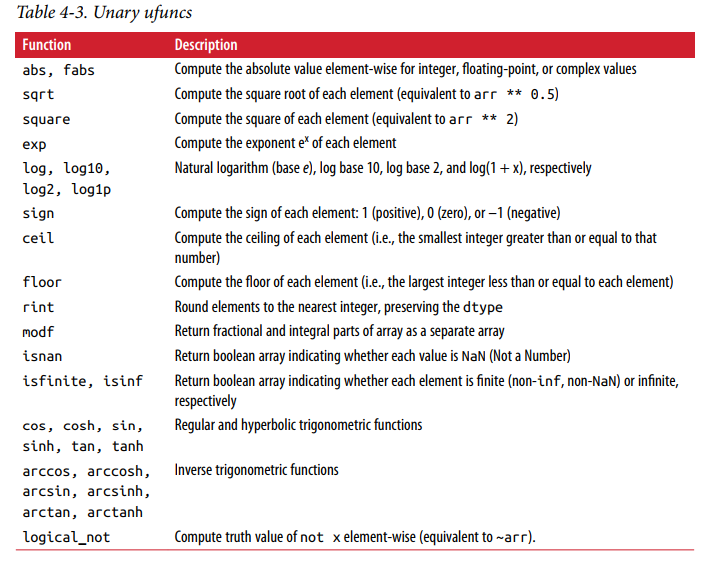

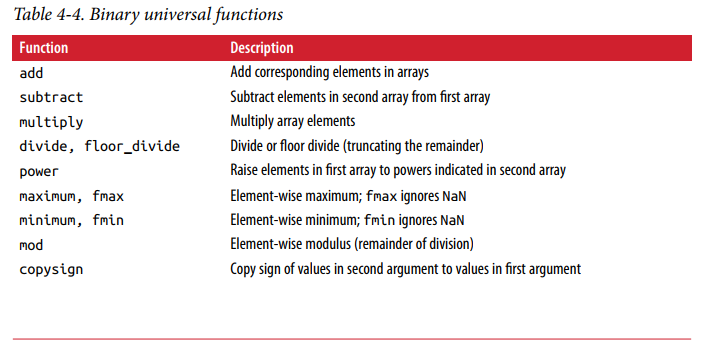

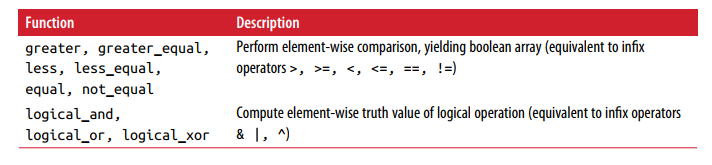

## 배열을 사용한 데이터 처리
NumPy 배열을 사용하면 반복문을 작성하지 않고 간결한 배열연산을 통해 많은 종류의 데이터 처리 작업을 할 수 있다.  
배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법을 흔히 벡터화라고 부르는데, 일반적으로 벡터화된 배열에 산술 연산은 순수 파이썬 연산에 비해 2~3에서 많게는 수십, 수백 배까지 빠르다. NumPy_Adv 에서 다룰 브로드 캐스팅은 아주 강력한 벡터 연산 방법이다.  

간단한 예로 값이 놓여 있는 그리드에서 $\sqrt{x^2 + y^2}$를 계산한다고 하자.  
np.meshgrid 함수는 2개의 1차원 배열을 받아 가능한 모든 (x, y)짝을 만들 수 있는 2차원 배열 2개를 반환한다.

In [122]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [123]:
xs, ys = np.meshgrid(points, points)

In [124]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [125]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [126]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

이제 그리드 상의 두 포인트를 가지고 간단하게 계산을 적용할 수 있다.  
계산된 값이 들어있는 2차원 배열로부터 그래프 이미지를 생성하기 위해 matplotlib의 imshow함수를 사용함

In [127]:
import matplotlib.pyplot as plt

In [128]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

In [129]:
 plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

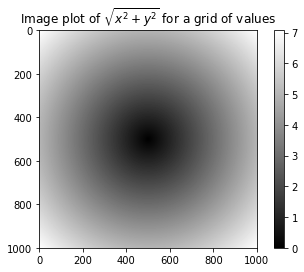

In [130]:
plt.show()

### 배열 연산으로 조건절 표현하기
numpy.where 함수는
```python
x if condition else y
```
같이 삼항식의 벡터화된 버전이다. 다음과 같이 불리언 배열 하나와 값이 들어있는 2개의 배열이 있다고 하자.

In [131]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

cond의 값이 true 일 때, xarr 값이나 yarr의 값을 취하고 싶다면 리스트 내포(list comprehension)을 이용해서 다음 처럼 작성

In [132]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

In [133]:
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

이 방법에는 몇 가지 문제, 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리하지 못한다는 것과 다차원 배열에선 사용할 수 없다는 문제가 있다. 하지만 np.where를 사용하면 아주 간결하게 작성할 수 있다.

In [134]:
result = np.where(cond, xarr, yarr)

In [135]:
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

np.where의 두 번째와 서 번째 인자는 배열이 아니라도 괜찮다. 둘 중 하나 혹은 둘 다 스칼라 값이라도 동작한다. 데이버 분석에서 일반적인 where의 사용은 다른 배열에 기반한 새로운 배열을 생성한다. 임의로 생성된 데이터가 있는 행렬이 있고 양수는 모두 2로, 음수는 모두 -2로 바꾸려면 np.where를 이용해서 쉽게 처리할 수 있다.

In [136]:
arr = np.random.randn(4, 4)

In [137]:
arr

array([[-1.02600983, -0.34193002,  1.69385903, -0.95415965],
       [ 0.85558587,  0.73047536,  0.32498755, -0.15611981],
       [-0.22292081,  0.95926576, -0.58976073,  0.29303658],
       [-0.75598057,  0.13632513, -1.35872969, -0.55396587]])

In [138]:
np.where(arr >0, 2, -2)

array([[-2, -2,  2, -2],
       [ 2,  2,  2, -2],
       [-2,  2, -2,  2],
       [-2,  2, -2, -2]])

In [139]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.02600983, -0.34193002,  2.        , -0.95415965],
       [ 2.        ,  2.        ,  2.        , -0.15611981],
       [-0.22292081,  2.        , -0.58976073,  2.        ],
       [-0.75598057,  2.        , -1.35872969, -0.55396587]])

where에 넘긴 배열은 같은 크기의 배열이거나 스칼라 값일 수 있다.  
where를 사용할 때 조금만 더 궁리를 하면 좀 더 복잡한 연산을 수행할 수 있다.  

다음 예제를 보자. cond1, cond2라는 2개의 불리언 배열을 가지고 조합 가능한 네 가지 경우마다 다른 값을 대입하고 싶다면 다음처럼 작성할 수 있다.
```python
result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
```  
한 번에 이해하기는 어렵겠지만 중첩된 where를 사용해서 다음 for 반복문은 앞의 예제와 같은 결과를 얻는다.
```python
np.where(cond1 & cond2, 0, 
        np.where(cond1, 1, 
                np.where(cond2, 2, 3)))
                ```  
 불리언 값은 0이거나 1인 값만 취하므로 가독성이 떨어지긴 해도 다음 코드처럼 산술 연산만 표현하는 것도 가능한다. 
 ```python
 result = 1 * (cond1 & -cond2) + 2 * (cond2 & -cond1) + 3 * -(cond1 | cond2)
 ```               

### 수학 메소드(함수)와 통계 메소드(함수)
배열 전체 혹은 배열에서 한 축에 따르는 자료에 대한 통계를 계산하기 위한 수학 함수는 배열 메소드로 사용할 수 있다. 전체의 sum, mean, std(표준편차)sms NumPy의 최상위 함수를 이용하거나 배열의 인스턴스 메소드(aggregations 객체지향 프로그래밍 전산용어로 집합정도 이해하면 될 듯함. (often called reductions) )를 사용해서 구할 수 있다.

In [141]:
 arr = np.random.randn(5, 4)

In [142]:
arr

array([[ 0.3166897 ,  1.55198627,  2.59678134, -0.27248093],
       [ 0.2059705 , -0.63959664,  0.35981429,  0.00381925],
       [-0.82858669,  0.01195188,  0.09005087,  0.98805698],
       [ 1.08131904,  1.7096302 , -1.22575846, -0.53920495],
       [-0.33582482, -0.61370356, -0.38579996, -1.51940141]])

In [143]:
arr.mean() # 인스턴스 매소드

0.12778564489740546

In [144]:
np.mean(arr)

0.12778564489740546

In [145]:
arr.sum()

2.5557128979481094

mean이나 sum 같은 함수는 선택적으로 axis 인자를 받아 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환한다.  
arr.mean(1) means “compute mean across the columns”  
where arr.sum(0) means “compute sum down the rows.”

In [146]:
arr.mean(axis=1)

array([ 1.04824409, -0.01749815,  0.06536826,  0.25649646, -0.71368244])

In [147]:
arr.sum(axis=0)

array([ 0.43956773,  2.02026814,  1.43508808, -1.33921105])

cumsum과 cumprod는 인스턴스 메소드를 할수 없다 (not aggregate) 그래서 중간 계산 값을 담고 있는 배열을 반환한다.  

이게 무슨 말이냐? 수학적으로 말하면 functional 연산? 불가능  
functional 결과는 number가 나와야 한다.

In [148]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [152]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [153]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

In [154]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [155]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [156]:
arr.cumsum(1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

In [157]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

기본 배열 통계 메소드
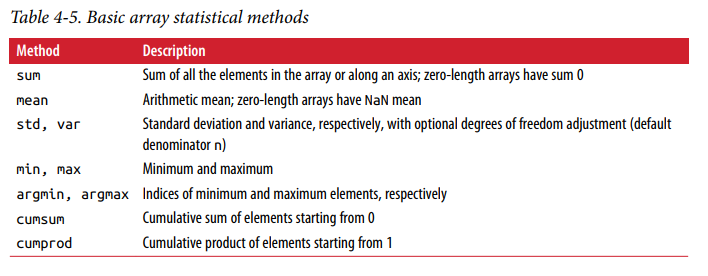

### 불리언 배열을 위한 메소드
앞의 메소드에서 불리언 값은 1(True),0(False)으로 취급된다. 따라서 불리언 배열에 대한 sum 메소드를 실행하면 True인 원소의 개수를 반환한다.

In [158]:
arr = np.random.randn(100)

In [159]:
(arr > 0).sum() # Number of positive values

48

```python
bools = np.array([False, False, True, False])
bools.any()
bools.all()
any(), all()
``` 
메소드는 불리언 배열에 사용할 때 특히 유용하다  
any 메소드는 하나 이상의 True 값이 있는지 검사하고,  
all 메소드는 모든 원소가 True 인지 검사한다

In [160]:
bools = np.array([False, False, True, False])

In [161]:
bools.any()

True

In [162]:
bools.all()

False

이 메소드는 불리언 배열이 아니어도 동작하며, 0이 아닌 원소는 모두 True로 간주한다.

### 정렬(sorting)
파이썬의 내장 리스트형 처럼 NumPy 배열 역시 Sort 메서드를 이용해서 정렬할 수 있다.

In [163]:
arr = np.random.randn(6)

In [164]:
arr

array([-0.72572043, -1.95540154,  0.50364353,  0.45764551, -0.61710783,
        0.00606898])

In [165]:
arr.sort()

In [166]:
arr

array([-1.95540154, -0.72572043, -0.61710783,  0.00606898,  0.45764551,
        0.50364353])

다차원 배열의 정렬은 sort 메서드에 넘긴 축의 값에 따라 1차원 부분을 정렬한다.

In [167]:
arr = np.random.randn(5, 3)

In [168]:
arr

array([[ 0.20043153,  2.1897461 ,  1.82377412],
       [-1.70631107,  0.65568672,  1.32110858],
       [-0.73002963,  0.85870829, -2.09394189],
       [ 0.23387316, -1.60753072,  0.44620291],
       [ 0.10390828,  0.14162195, -0.01124963]])

In [169]:
arr.sort(1)

In [170]:
arr

array([[ 0.20043153,  1.82377412,  2.1897461 ],
       [-1.70631107,  0.65568672,  1.32110858],
       [-2.09394189, -0.73002963,  0.85870829],
       [-1.60753072,  0.23387316,  0.44620291],
       [-0.01124963,  0.10390828,  0.14162195]])

np.sort 메소드는 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본을 반환한다.  
배열의 분위수[Percentiles and Quartiles(백분위수 및 사분위수) 잊어버렸으면 검색하거나 기초 통계책 뒤져보라]를 구하는 쉽고 빠른 방법은 우선 배열을 정렬한 후에 특정 분위의 값을 선택하는 것이다.

In [171]:
large_arr = np.random.randn(1000)

In [172]:
large_arr.sort()

In [173]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.7827893716681957

NumPy의 sorting method 관한 자세한 내용과 간접 정렬 같은 고급 기법은 NumPy_Adv참고  
정렬과 관련된 다른 여러 가지 데이터 처리 (표 형식의 데이터를 하나 이상의 칼럼으로 정렬하기 같은)에 대한 내용은 Pandas 참조

### 집합 함수
NumPy는 1차원 ndarray를 위한 몇 가지 기본 집합연산을 제공한다. 아마도 가장 자주 사용되는 함수는 배열 내에서 중복된 원소를 제거하고 남은 원소를 정렬된 형태로 반환하는 np.unique일 것 이다.

In [174]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [176]:
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [177]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [178]:
np.unique(ints)

array([1, 2, 3, 4])

In [179]:
#np.unique를 순수 파이썬만으로 구현하면 다음과 같다.
sorted(set(names))

['Bob', 'Joe', 'Will']

In [180]:
#np.in1d 함수는 2개의 배열을 인자로 받아 첫 번째 배열의 각 원소가 두 번쨰 배열의 원소를 포함하는지를 나타내는 불리언 배열을 반환한다.
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

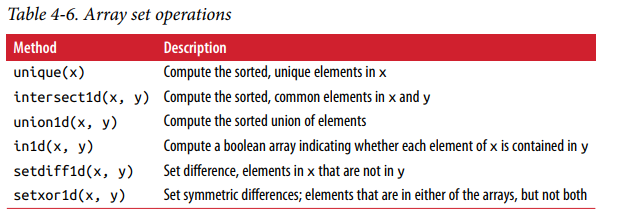

## 배열의 파일 입 $\centerdot$ 출력
NumPy는 디스크에서 텍스트나 바이너리 형식의 파일로부터 데이터를 불러오거나 저장할 수 있다. 표 형식의 데이터를 메모리에 입력하는 방법은 Pandas 참조
### 배열을 binary 형식으로 디스크에 저장하기
np.save와 np.load는 배열 데이터를 효과적으로 디스크에 저장하고 불러오는 함수다.  
배열은 기본적으로 압축되지 않는 raw 바이너리 형식의 $ filename.npy$ 파일로 저장된다

In [181]:
arr = np.arange(10)

In [182]:
 np.save('some_array', arr) # 현재 이 스크립트 실행되고 있는 디렉토리에 저장 

저장되는 파일 경로가 .npy로 끝나지 않으면 자동적으로 확장자를 추갛나다. 이렇게 저장된 배열을 np.load로 불러올 수 있다.

In [183]:
%ls

 C 드라이브의 볼륨: System
 볼륨 일련 번호: 84DC-4A07

 C:\Users\177303\Documents\Python Scripts\Numerical analysis 디렉터리

2018-01-22  오전 04:43    <DIR>          .
2018-01-22  오전 04:43    <DIR>          ..
2018-01-22  오전 03:04    <DIR>          .ipynb_checkpoints
2018-01-19  오후 05:03           841,438 Matplotlib.ipynb
2018-01-22  오전 04:42         1,026,762 Numpy_basic.ipynb
2018-01-22  오전 04:43               120 some_array.npy
2018-01-21  오후 11:25        23,744,749 수학적 기초와 오차 분석.ipynb
               4개 파일          25,613,069 바이트
               3개 디렉터리  386,588,868,608 바이트 남음


In [184]:
 np.load('some_array.npy') # 위와 동일함

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.savez 함수를 이용하면 여러 개의 배열을 압축된 형식으로 저장할 수 있는데, 저장하려는 배열은 키워드 인자 형태로 전달된다.

In [185]:
np.savez('array_archive.npz', a=arr, b=arr)

npz 파일을 불러올 때는 각각의 배열을 언제라도 불러올수 있게 사전 형식의 객체에 저장한다.

In [186]:
arch = np.load('array_archive.npz')

In [187]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

데이터 압축하고 싶으면 np.savez_compressed() 메소드 이용

In [188]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

### 텍스트 파일 불러오기와 저장하기
텍스트 파일에서 불러오기는 특별할 것이 없는 작업인데, 파이썬을 처음 접하는 독자에게는 파일을 읽고 쓰는 함수가 익숙하지 않을테니 (파이썬 기초 프로그래밍 파일 입출력  open , write 메소드 부분 참고) pandas에서 제공하는 read_csv 와 read_table 함수 위주로 설명 할 수 있으나 이것은 pandas에서 말할것이고 np.loadtxt나 좀 더 특별한 np.getfromtxt를 이용해서 NumPy 배열로 직접 데이터를 불러오는 게 유용할 때도 있다.  

np.loadtxt 함수는 구분자를 지정하거나 특정 칼럼에 대한 변환 함수를 지정하거나 로우를 건너뛰는 등의 다양한 기능을 제공한다.

In [189]:
!cat some_array.npy # cat 은 리눅스상에서 배시쉴 명령어

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [190]:
!type some_array.npy

밡UMPY F {'descr': '<i4', 'fortran_order': False, 'shape': (10,), }           
                            	   


### 만약에...

```python
!cat  array_ex.txt
```

0.5 , 556 ,5565
0.4, 555 ,555
0.2, 1122 ,222  
이렇게 저장되었다고 하자

```python
arr = np.loadtxt('array_ex.txt',delimiter=',')
arr
array([[0.5 , 556 ,5565],
[0.4, 555 ,555],
[0.2, 1122 ,222 ]])
```

# 선형대수(Linear algebra)!!!
**넘파이의 알파이지 오메가~!!!**  
행렬의 곱셈, 분할, 행렬식, 정사각 행렬 수학 같은 선형대수는 배열을 다루는 라이브러리에서 중요한 부분이다. MATLAB (OCTAVE) 같은 다른 언어와 달리 2개의 2차원 배열을 $*$ 연산자로 곱하는 건 행렬 곱셈이 아니라 대응하는 각각의 원소를 곱을 계산한는 것이다. 행렬 곱셈은 배열 메소드이자 **numpy** 네임스페이스(쉽게 말하면 라이브러리(함수)들의 집합들[집합족 class or family]) 안에 있는 함수인 dot 함수를 사용해서 계산한다.


In [194]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [196]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [197]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [198]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [199]:
np.dot(x, y) # x.dot(y) 동일하다

array([[  28.,   64.],
       [  67.,  181.]])

2차원 배열과 곱세이 가능한 크기의 1차원 배열 간 행렬 곱셈의 결과는 1차원 배열이다.

In [200]:
np.dot(x, np.ones(3))

array([  6.,  15.])

Python 3.5 이상에서 @ 기호는 행렬 곱셈에서 infix 연산자 행동한다 (객체지향의 overridding 개념 검색 추천)

In [201]:
x @ np.ones(3) # np.dat(x, np.ones(3))

array([  6.,  15.])

$\large {numpy.linalg}$ 는 행렬의 분할과 역행렬, 행렬식 같은 것을 포함하고 있다.  
이는 MATLAB, R 같은 언어에서 사용하는 표준 포트란 라이브러리인 BLAS, LAPACK 또는 Intel MKL (math kernel library)를 사용해서 구현되었다.

구현 방식은 NumPy 빌드에 따라 다르다.

In [202]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)

mat = X.T.dot(X) #The expression X.T.dot(X) computes the dot product of X with its transpose X.T

In [203]:
inv(mat)

array([[ 2.14406396, -0.28724155,  1.26214589,  2.70038276, -2.32805111],
       [-0.28724155,  1.51477005,  0.14508557,  0.11893538, -2.21626807],
       [ 1.26214589,  0.14508557,  1.37160348,  2.00731448, -1.94688674],
       [ 2.70038276,  0.11893538,  2.00731448,  4.17249804, -3.81447429],
       [-2.32805111, -2.21626807, -1.94688674, -3.81447429,  7.54094782]])

In [208]:
mat.dot(inv(mat))
# 과학 계산 파이썬 커뮤니티는 언젠가 np.dot을 사용하는 대신 
#문법적으로 횔씬 보기 좋은 행렬 곱셈 이항 연산자(보다 직관적인 표현)가 구현되기를 기대하고 있다 
#하지만 현재까지는 np.dot을 사용할 수 밖에 없다.

array([[  1.00000000e+00,   8.89527773e-17,  -6.05206049e-16,
         -1.14385225e-15,   7.78303420e-16],
       [  1.72224236e-16,   1.00000000e+00,   6.52928858e-16,
          9.94533796e-17,  -2.40374872e-16],
       [  3.39184653e-16,  -7.73211960e-18,   1.00000000e+00,
         -2.14639914e-17,  -5.17028440e-16],
       [ -2.12943320e-17,   1.88840582e-16,  -2.01652399e-17,
          1.00000000e+00,   4.10011102e-16],
       [  4.98800704e-16,   2.36462407e-16,  -9.13265010e-17,
          4.12663482e-16,   1.00000000e+00]])

In [205]:
q, r = qr(mat)

In [206]:
 r

array([[-7.04626639, -6.17126376, -0.52432413,  2.33797506, -2.97486025],
       [ 0.        , -2.68916482,  1.00721129, -1.99201378, -1.5842952 ],
       [ 0.        ,  0.        , -2.57538755,  1.24859156, -0.04625215],
       [ 0.        ,  0.        ,  0.        , -0.35915677, -0.2315166 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.1081235 ]])

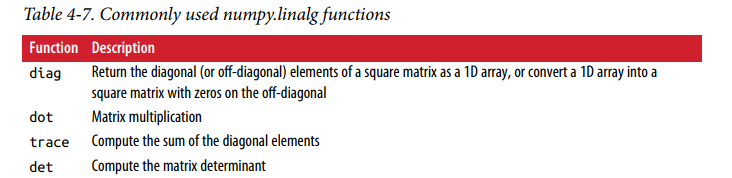

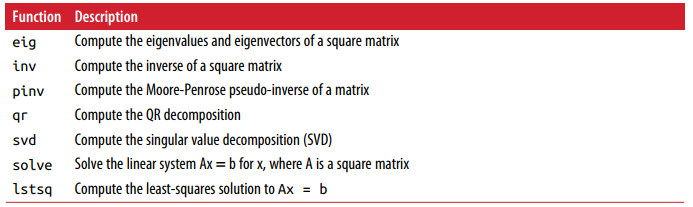
앞부분 diag ~ trace 는 numpy.diag ~ numpy.trace로 호출명이고
나머지는 numpy.linlg.det ~ numpy.linlg.lstsq 이 호출명이다. 

## 유사 난수 생성 Pseudorandom Number Generation
numpy.random 모듈은 파이썬 내장 random 함수를 보강하여 다양한 종류의 확률분포로부터 효과적으로 표본 값을 생성하는데 주로 사용된다. 예를 들어 normal을 사용하여 표준정규분포로부터 $4 \times 4$ 크기의 표본을 생성할 수 있다.

In [209]:
samples = np.random.normal(size=(4, 4))

In [210]:
samples

array([[-0.53487276,  0.54151249,  1.05704121,  0.32920617],
       [-1.92239791,  0.47411777,  0.41755726, -0.60553416],
       [ 1.70428263, -0.59093894, -1.11667111, -0.35971096],
       [ 0.74064541,  0.35829351, -1.73092573, -0.56602535]])

이에 비해 파이썬 내장 random 모듈은 한 번에 하나의 값만 생성할 수 있다. 아래 성능 비교에서 알수 있듯이 numpy.random은 매우 큰 표본을 생성하는데 파이썬 내장 모듈 보다 수십배 이상 빠르다.

In [212]:
from random import normalvariate

N = 1000000

In [213]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

718 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [214]:
%timeit np.random.normal(size=N)

30.3 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


난수 발생기의 seed 값이 입력값으로 들어가 결정론적(주기가 유한한)행동 양상이 구현된 알고리즘 의해서 난수가 발생되기 때문에
이 난수는 진정한 난수가 아니라 유사 난수이다.
또한 시드 값을 고정시켜서 일정한 유사 난수를 얻을 수도 있다. 보통은 유닉스 에포크 기반한 os 시간을 seed 값으로 정한다

numpy.random에서 난수 발생 함수는 글로발 난수 시드 사용한다.  만약 global state 피하기 위해 random.RandomState 사용해서 global state와 독립된(isolated) 난수 발생기를 생성한다.

In [219]:
np.random.seed(1234)
np.random.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [224]:
rng = np.random.RandomState(1234)

In [225]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

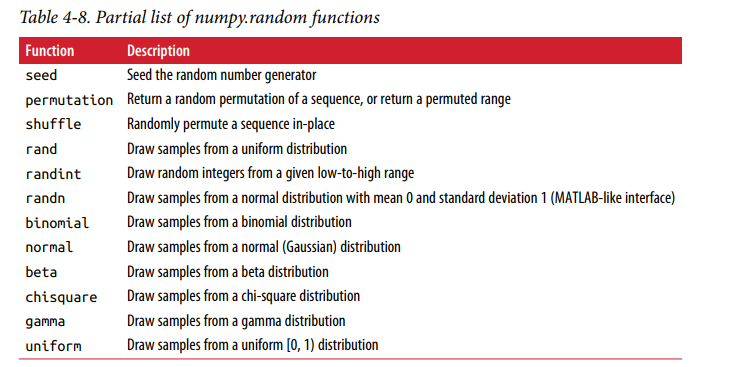
### 계단 오르내리기 예제 (Random walk)
계단 오르내리기 예제는 배열연산의 활용을 보여줄 수 있는 간단한 애플리케이션이다. 계단의 중간에서 같은 확률로 한 계단 올라가거나 내려간다고 가정하자. 순수 파이썬으로 내장 random 모듈을 사용하여 계단 오르내리기를 1,000번 수행하는 코드는 다음처럼 작성할 수 있다.

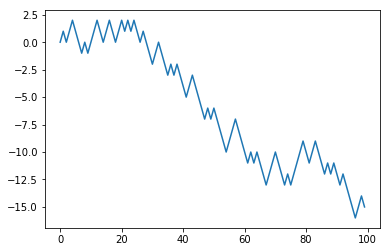

In [226]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])
plt.show()

walk는 계단을 오르거나 (+1) 내려간(-1) 값의 누적 합이라는 사실을 알 수 있으며 배열식으로 나타낼 수 있다. 그래서 np.random 모듈을 사용해서 1,000번 수행한 결과(1,-1)를 한 번에 저장하고 누적 합을 계산한다.

In [227]:
nsteps = 1000

In [228]:
draws = np.random.randint(0, 2, size=nsteps)

In [229]:
steps = np.where(draws > 0, 1, -1)

In [230]:
walk = steps.cumsum()

여기서부터 계단을 오르내린 위치의 최소/최대 값 같은 간단한 통계를 구할 수 있다.

In [231]:
walk.min()

-3

In [232]:
walk.max()

66

계단에서 특정 위치에 도달하기까지의 시간 같은 좀 더 복잡한 통계를 구할 수 있는데, 계단의 처음 위치에서 최초로 10칸 떨어지기까지 얼마나 걸렸는지 확인 해보면

In [233]:
np.abs(walk)>=10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

위 메소드를 통해 처음 위치에서 10칸 이상 떨어진 시점을 알려주는 불리언 배열을 얻을 수 있다. 우리는 최조의 10 혹은 -10인 시점을 구해야 하므로 불리언 배열에서 최대 값의 처음 색인을 반환하는 argmax를 사용하자 (True가 최대 값이다)

In [234]:
(np.abs(walk) >= 10).argmax()

235

여기서 argmax를 사용하긴 했지만 argmax는 배열 전체를 모두 확인하기 때문에 효과적인 방법은 아니다. 또한 이 예제에서는 True가 최대 값임을 이미 알고 있었다.
### 한 번에 계단 오르내리기 시뮬레이션하기 Simulating Many Random Walks at Once
계단 오르내리기를 많은 횟수, 대략 5,000회 정도 시뮬레이션해야 한다면 앞의 코드를 조금만 수정해서 해결할 수 있다.
numpy.random 함수에 크기가 2인 튜플을 넘기면 2차원 배열이 생성되고 각 칼럼에서 누적 합을 구해 5,000회의 시뮬레이션을 한 번에 처리할 수 있다.

In [248]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [236]:
walks

array([[  1,   0,  -1, ...,  44,  43,  42],
       [  1,   0,  -1, ...,  42,  41,  42],
       [ -1,  -2,  -1, ..., -40, -41, -42],
       ..., 
       [  1,   0,   1, ...,  64,  63,  64],
       [  1,   2,   1, ...,   0,   1,   2],
       [  1,   0,  -1, ...,  34,  35,  34]], dtype=int32)

모든 시뮬레이션에 대해 최대 값과 최소 값을 구해보자

In [237]:
walks.max()

115

In [238]:
walks.min()

-130

이 데이터에서 누적 합이 30 혹은 -30이 되는 최소 시점을 계산해보자. 5000회의 시뮬레이션 중 모든 경우가 30에 도달하지 않아 계산이 약간 까다롭긴 하지만 any 메소드를 사용해서 해결.

In [239]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

In [240]:
hits30.sum() # Number that hit 30 or -30

3373

이 불리언 배열을 사용해 walks에서 column을 선택하고 절대 값이 30이 넘는 경우에 대해서 축 1의 argmax 값을 구하면 처음 위치에서 30칸 이상 멀어지는 최소 횟수를 구할 수 있다.

In [241]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [242]:
crossing_times.mean()

507.6125111176994

다른 분포를사용해도 여러 가지 시도를 해보자. normal 함수를 표준 편차와 평균 값을 넣어 정규 분포에서 표본을 추출하는 것처럼 다른 난수 발생 함수를 사용하기만 하면 된다.

In [249]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))